# STA2453 - Class 2

## September 24, 2019

### Linear Regression

![](bikeshare1.png)

<https://bikesharetoronto.com>

# Open Toronto Data

[Bike Share Ridership Data](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/)

In [2]:
import pandas as pd 

# Data from Q1 of 2017

q1_file = 'Bikeshare Ridership (2017 Q1).csv'
q1 = pd.read_csv(q1_file)

q1.head(10)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member
5,712387,1/1/2017 0:12,1/1/2017 0:22,571,7021,Bay St / Albert St,7046,Niagara St / Richmond St W,Member
6,712388,1/1/2017 0:15,1/1/2017 0:33,1084,7161,Beverly St / College St W,7176,Bathurst St / Fort York Blvd,Member
7,712389,1/1/2017 0:15,1/1/2017 0:21,307,7195,Ulster St / Bathurst St,7037,Bathurst St / Dundas St W,Member
8,712390,1/1/2017 0:20,1/1/2017 0:31,647,7017,Widmer St / Adelaide St,7101,Lower Sherbourne St / The Esplanade,Member
9,712391,1/1/2017 0:23,1/1/2017 0:27,217,7017,Widmer St / Adelaide St,7005,University Ave / King St W,Member


# Question

**Question:** Is the duration of a bike influenced by weather? For example, do Bike Share customers take longer bike rides in warmer weather? 

# Initial Look at Data ...

In [3]:
print(q1.shape)

(132123, 9)


In [4]:
t = pd.to_datetime(q1['trip_start_time'], format = '%d/%m/%Y %H:%M')
# check 3 months, 24 hours and 31 days
print(t.dt.hour.nunique())
print(t.dt.day.nunique())
print(t.dt.month.nunique())

24
31
3


In [5]:
t.dt.hour.hist(bins=10, color="grey", edgecolor = "black")

In [6]:
# but now we are including 2016  
# and this isn't correct since in Nov. EST is
# -1 hour due to daylight savings time

import datetime as dt

(t +  dt.timedelta(hours = -4))[0:10] 

0   2016-12-31 20:00:00
1   2016-12-31 20:00:00
2   2016-12-31 20:05:00
3   2016-12-31 20:07:00
4   2016-12-31 20:08:00
5   2016-12-31 20:12:00
6   2016-12-31 20:15:00
7   2016-12-31 20:15:00
8   2016-12-31 20:20:00
9   2016-12-31 20:23:00
Name: trip_start_time, dtype: datetime64[ns]

In [7]:
#convert to EST
t1 = pd.DatetimeIndex(t).tz_localize('UTC').tz_convert('US/Eastern')

In [8]:
print(t1.hour.nunique())
print(t1.day.nunique())
print(t1.month.nunique())

24
31
4


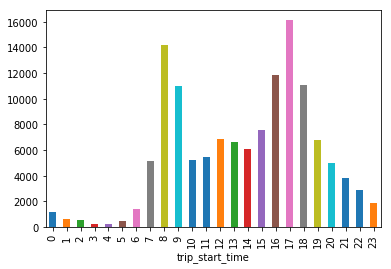

In [9]:
q1['trip_start_time'] = t1
q1.groupby(q1['trip_start_time'].dt.hour)['trip_start_time'].count().plot(kind='bar')

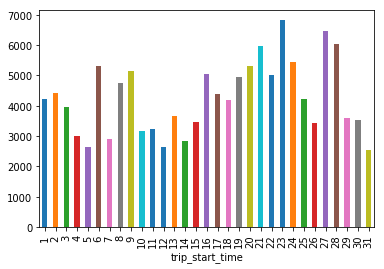

In [10]:
q1.groupby(q1['trip_start_time'].dt.day)['trip_start_time'].count().plot(kind='bar')

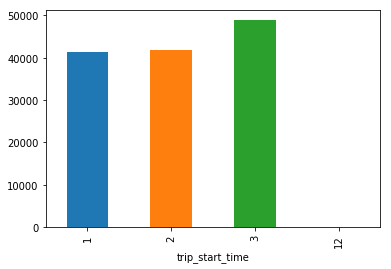

In [11]:
q1.groupby(q1['trip_start_time'].dt.month)['trip_start_time'].count().plot(kind='bar')

In [12]:
q1['Date'] = q1['trip_start_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
q1['Day'] = q1['trip_start_time'].dt.day
q1['Month'] = q1['trip_start_time'].dt.month
q1['start_hr'] = q1['trip_start_time'].dt.hour
q1['start_min'] = q1['trip_start_time'].dt.minute

# Weather Data

Historical weather data is available from a Government of Canada [website](http://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=1#).

The website can be scraped.  See <http://climate.weather.gc.ca/robots.txt> which states that it's OK to crawl this website.

The weather data will need to be merged with the ridership data.

In [14]:
base_url = 'http://climate.weather.gc.ca/climate_data/daily_data_e.html?'
query_url = 'StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=1#'

jan_weather = pd.read_html(base_url+query_url)
jan_weather = jan_weather[0][0:31]
jan_weather

,DAY,Max Temp Definition°C,Min Temp Definition°C,Mean Temp Definition°C,Heat Deg Days Definition,Cool Deg Days Definition,Total Rain Definitionmm,Total Snow Definitioncm,Total Precip Definitionmm,Snow on Grnd Definitioncm,Dir of Max Gust Definition10's deg,Spd of Max Gust Definitionkm/h
0,01,1.8,-2.5,-0.4,18.4,0.0,0.0,0.0,0.0,3,27.0,50
1,02,4.8,-4.1,0.4,17.6,0.0,LegendTT,0.0,LegendTT,2,10.0,35
2,03,4.4,1.7,3.1,14.9,0.0,15.8,0.0,15.8,LegendTT,NaN,<31
3,04,3.5,-8.5,-2.5,20.5,0.0,0.2,LegendTT,0.2,LegendTT,27.0,80
4,05,-6.5,-11.9,-9.2,27.2,0.0,0.0,LegendTT,LegendTT,LegendTT,25.0,56
5,06,-7.3,-13.4,-10.4,28.4,0.0,0.0,0.0,0.0,LegendTT,26.0,43
6,07,-7.6,-14.2,-10.9,28.9,0.0,0.0,0.0,0.0,LegendTT,28.0,41
7,08,-9.0,-13.4,-11.2,29.2,0.0,0.0,LegendTT,LegendTT,LegendTT,25.0,50
8,09,-2.7,-9.5,-6.1,24.1,0.0,0.0,LegendTT,LegendTT,LegendTT,25.0,57
9,10,7.8,-3.1,2.4,15.6,0.0,11.2,7.2,19.0,1,23.0,74


In [128]:
# rename columns

# chr(186) is unicode char for degree 
newcolnames = {'DAY' : 'Date','Mean Temp Definition' + chr(176)+'C': 'Mean_Temp', 'Total Precip Definitionmm' :'Total_Precip'}
jan_weather.rename(columns = newcolnames, inplace = True)

# create date that can be merged with ridership data
jan_weather['Date'] = '2017'+ '-'+'01' + '-' + jan_weather['Date']

# replace trace rain values with 0.
jan_weather = jan_weather[['Date', 'Mean_Temp', 'Total_Precip']].replace('LegendTT', 0)

jan_weather.head()

,Date,Mean_Temp,Total_Precip
0,2017-01-2017-01-2017-01-2017-01-01,-0.4,0.0
1,2017-01-2017-01-2017-01-2017-01-02,0.4,0
2,2017-01-2017-01-2017-01-2017-01-03,3.1,15.8
3,2017-01-2017-01-2017-01-2017-01-04,-2.5,0.2
4,2017-01-2017-01-2017-01-2017-01-05,-9.2,0


Do the same for February and March ...

In [15]:
query_url = 'StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=2#'

feb_weather = pd.read_html(base_url+query_url)
feb_weather = feb_weather[0][0:28]

# rename columns
feb_weather.rename(columns = {'DAY' : 'Date','Mean Temp Definition' + chr(176)+'C': 'Mean_Temp', 'Total Precip Definitionmm' :'Total_Precip'}, inplace = True)

# create date that can be merged with ridership data
feb_weather['Date'] = '2017'+ '-'+'02' + '-' + feb_weather['Date']

# replace trace rain values with 0.
feb_weather = feb_weather[['Date', 'Mean_Temp', 'Total_Precip']].replace('LegendTT', 0)

feb_weather.head()

,Date,Mean_Temp,Total_Precip
0,2017-02-01,-1.2,0.4
1,2017-02-02,-5.0,0
2,2017-02-03,-7.1,0
3,2017-02-04,-5.7,0
4,2017-02-05,-1.5,0.8


In [16]:
query_url = 'StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=3#'

march_weather = pd.read_html(base_url+query_url)
march_weather = march_weather[0][0:31]

# rename columns
march_weather.rename(columns = {'DAY' : 'Date','Mean Temp Definition' + chr(176)+'C': 'Mean_Temp', 'Total Precip Definitionmm' :'Total_Precip'}, inplace = True)

# create date that can be merged with ridership data
march_weather['Date'] = '2017'+ '-'+'02' + '-' + march_weather['Date']

# replace trace rain values with 0.
march_weather = march_weather[['Date', 'Mean_Temp', 'Total_Precip']].replace({'LegendTT':0, 'LegendMM':0})


march_weather.head()

,Date,Mean_Temp,Total_Precip
0,2017-02-01,5.0,19.8
1,2017-02-02,-4.9,0
2,2017-02-03,-7.5,0.2
3,2017-02-04,-9.6,0
4,2017-02-05,-7.1,0.0


Merge January, February, and March ...

In [18]:
weather = pd.concat([jan_weather, feb_weather, march_weather], sort = False)

weather.head()

,DAY,Max Temp Definition°C,Min Temp Definition°C,Mean Temp Definition°C,Heat Deg Days Definition,Cool Deg Days Definition,Total Rain Definitionmm,Total Snow Definitioncm,Total Precip Definitionmm,Snow on Grnd Definitioncm,Dir of Max Gust Definition10's deg,Spd of Max Gust Definitionkm/h,Date,Mean_Temp,Total_Precip
0,01,1.8,-2.5,-0.4,18.4,0.0,0.0,0.0,0.0,3,27.0,50,NaN,NaN,NaN
1,02,4.8,-4.1,0.4,17.6,0.0,LegendTT,0.0,LegendTT,2,10.0,35,NaN,NaN,NaN
2,03,4.4,1.7,3.1,14.9,0.0,15.8,0.0,15.8,LegendTT,NaN,<31,NaN,NaN,NaN
3,04,3.5,-8.5,-2.5,20.5,0.0,0.2,LegendTT,0.2,LegendTT,27.0,80,NaN,NaN,NaN
4,05,-6.5,-11.9,-9.2,27.2,0.0,0.0,LegendTT,LegendTT,LegendTT,25.0,56,NaN,NaN,NaN


Now merge ridership data with weather ...

In [19]:
# inner: use intersection of keys from both frames
q1_weather = q1.merge(weather[['Date', 'Mean_Temp', 'Total_Precip']], on = 'Date', how = 'inner')

# Total_Precip got ceoverted to char
q1_weather['Total_Precip'] = pd.to_numeric(q1_weather['Total_Precip'])

q1_weather.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,Date,Day,Month,start_hr,start_min,Mean_Temp,Total_Precip
0,761424,2017-02-01 00:02:00-05:00,1/2/2017 5:12,603,7164,Victoria St / Gould St (Ryerson University),7161,Beverly St / College St W,Member,2017-02-01,1,2,0,2,-1.2,0.4
1,761424,2017-02-01 00:02:00-05:00,1/2/2017 5:12,603,7164,Victoria St / Gould St (Ryerson University),7161,Beverly St / College St W,Member,2017-02-01,1,2,0,2,5.0,19.8
2,761426,2017-02-01 00:05:00-05:00,1/2/2017 5:10,331,7025,Ted Rogers Way / Bloor St E,7055,Jarvis St / Carlton St,Member,2017-02-01,1,2,0,5,-1.2,0.4
3,761426,2017-02-01 00:05:00-05:00,1/2/2017 5:10,331,7025,Ted Rogers Way / Bloor St E,7055,Jarvis St / Carlton St,Member,2017-02-01,1,2,0,5,5.0,19.8
4,761427,2017-02-01 00:11:00-05:00,1/2/2017 5:19,436,7033,Union Station,7017,Widmer St / Adelaide St,Member,2017-02-01,1,2,0,11,-1.2,0.4


# Linear Regression


A linear regression model is:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \mbox{} i=1, \ldots, n$$

$Y_i$ is trip duration, $x_i$ is the temperature, $n$ is the number of observations, and $\epsilon \sim N\left(0,\sigma^2\right)$

# Linear Regression Statistical Assumptions

1. For any value of $x$, $y$ is a $N\left(\beta_0 + \beta_1 x, \sigma^2 \right)$ random variable.

2. Independence: $y_1, \ldots, y_n$ are statistically independent.

3. Linearity: The mean value of $y$ is a linear function of $x$.

4. Homoscedasticity: The variance of $y$ is the same for any $x$.


# Estimating Regression Coefficients

Estimates of the regression coefficients $\beta_0, \beta_1$ are obtained by minimizing:

$$\underset{\beta_0, \beta_1}{\arg \min} \sum_{i=1}^n \left(y_i- (\beta_0 + \beta_1 x_i) \right)^2.$$

Using calculus there are closed form expressions for the minimizers: $\hat \beta_0, \hat \beta_1.$

The prediction for $y$ based on the $i^{th}$ value of $x$ is: $$\hat y_i = \hat \beta_0 + \hat \beta_1x_i.$$

$e_i = y_i-\hat y_i$ is the $i^{th}$ residual, and the residual sum of squares is $$RSS=\sum_{i=1}^n e_i^2.$$


# Accuracy of Regression

The accuracy of the regression coefficients can be evaluated by computing the standard errors of $\hat \beta_0, \hat \beta_1.$  

$\sigma^2$ can also be estimated by the formula $$RSE=\frac{RSS}{n-2}.$$


Standard errors can be used to test:

$$H_0: \text{There is no linear relationship between } x \text{ and } y$$ 
vs.
$$H_a: \text{There is a linear relationship between } x \text{ and } y$$ 

Which corresponds to testing:

$$H_0: \beta_1=0  \hspace{0.5cm} \mbox{vs.} \hspace{0.25cm}H_a: \beta_1 \ne 0.$$ 

Tests and confidence intervals are based on:

$$\frac{\hat \beta_1}{SE\left(\hat \beta_1 \right)} \sim t_{n-2}$$



# Accuracy of Model


$$R^2 = 1- \frac{\sum_{i=1}^n (y_i-\hat y_i)^2}{\sum_{i=1}^n (y_i - \bar y_i)^2}$$

The proportion of variability in $y$ that can be explained by linear regression model of $y$ on $x$.



# Simulated Data

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4606.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           3.37e-84
Time:                        20:58:19   Log-Likelihood:                -21.034
No. Observations:                 100   AIC:                             46.07
Df Residuals:                      98   BIC:                             51.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3691      0.088     -4.216      0.0

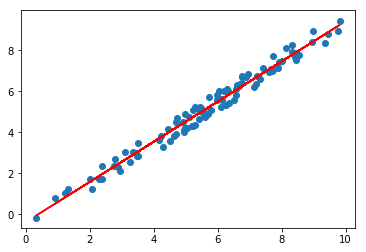

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

np.random.seed(24)
y = np.random.normal(5, 2, 100) #random sample of 100 from N(5,4)
x = y + np.random.uniform(0,1,100) #add some random noise to y

# store in pandas df
data = pd.DataFrame({'y': y, 'x':x}) 

#use stats models ols using R like formulas
Model = smf.ols("y ~ x", data = data).fit()

print(Model.summary())

print('\n RSE:', np.round(Model.ssr/Model.df_resid,2))

# scatter plot x vs. y

M = linregress(x, y) # get slope and intercept

m = M.slope #slope
b = M.intercept #intercept

plt.scatter(x,y)
plt.plot(x, m*x+b, color='red')

# Back to Ridership Data ...

In [22]:
# create a data frame for regression modelling
Y = q1_weather.groupby(['Month','Day', 'user_type'])['trip_duration_seconds'].mean()
X = q1_weather.groupby(['Month', 'Day', 'user_type'])['Total_Precip'].mean()
X1 = q1_weather.groupby(['Month', 'Day', 'user_type'])['Mean_Temp'].mean()


df = pd.DataFrame({'dur': Y, 'precip': X, 'temp':X1})
df['log_dur']=df['dur'].transform(lambda x: np.log(x))
df['log_precip']=df['precip'].transform(lambda x: np.log(x+1))

df.reset_index(inplace=True)
df.head()

,Month,Day,user_type,dur,precip,temp,log_dur,log_precip
0,2,1,Casual,2051.214286,10.1,1.90,7.626187,2.406945
1,2,1,Member,634.037274,10.1,1.90,6.452108,2.406945
2,2,2,Casual,1098.960000,0.0,-4.95,7.002120,0.000000
3,2,2,Member,601.788296,0.0,-4.95,6.399906,0.000000
4,2,3,Casual,1031.228571,0.1,-7.30,6.938506,0.095310


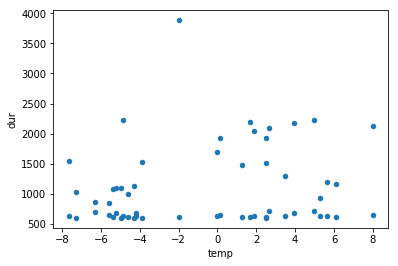

In [23]:
df.plot.scatter(x='temp',y='dur')

In [24]:
model = smf.ols("dur ~ temp", data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.344
Date:                Mon, 23 Sep 2019   Prob (F-statistic):              0.251
Time:                        20:58:25   Log-Likelihood:                -442.48
No. Observations:                  56   AIC:                             889.0
Df Residuals:                      54   BIC:                             893.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1117.0848     89.634     12.463      0.0

# Another question ...

Does the user type influence trip duration? 

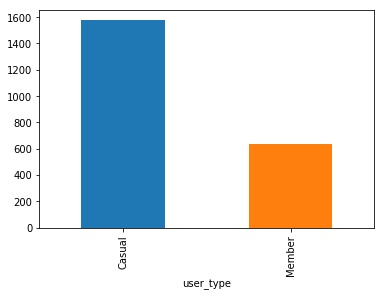

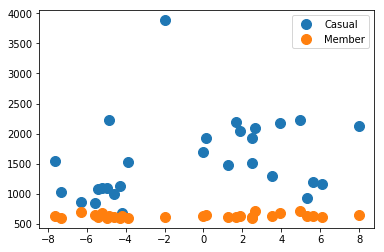

In [25]:
df.groupby('user_type')['dur'].mean().plot(kind='bar')

fig, ax = plt.subplots()

groups = df.groupby('user_type')

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.temp, group.dur, marker='o', linestyle='', ms=10, label=name)
ax.legend()
plt.show()

# How do we interpret a qualitative predictor/feature?

In [26]:
model = smf.ols("dur ~ C(user_type)", data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     54.64
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           9.52e-10
Time:                        20:58:31   Log-Likelihood:                -423.59
No. Observations:                  56   AIC:                             851.2
Df Residuals:                      54   BIC:                             855.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1573

$$x_i =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } i^{th} \mbox{person is member} \\
		0 & \mbox{if } i^{th} \mbox{person is casual}
	\end{array}
\right.$$

The regression equation becomes:

$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i = \left\{
	\begin{array}{ll}
		\beta_0 + \beta_1 + \epsilon_i  & \mbox{if } i^{th} \mbox{person is member} \\
		\beta_0 + \epsilon_i & \mbox{if } i^{th} \mbox{person is casual}
	\end{array}
\right.$$

$\beta_0$ is the average duration among members, $\beta_0+\beta_1$ is the average duration among casual users, and $\beta_1$ is the average difference in duration between members and casual users.  Testing $\beta_1$ is equivalent to a two-sample t-test. 

In [27]:
df.groupby('user_type')['dur'].mean().diff()

from scipy import stats

stats.ttest_ind(df[df['user_type']=='Member']['dur'], df[df['user_type']=='Casual']['dur'])

Ttest_indResult(statistic=-7.391939706681067, pvalue=9.515501058912983e-10)

# Adjusting for more than one feature/predictor

## Multiple Linear Regression

Do temperature and user type predict trip duration? 

# Multiple Linear Regression

$$y_i = \beta_0 + \beta_1x_{i1}+ \cdots +  \beta_1x_{ip} + \epsilon_i, i= 1,\ldots,n.$$

In matrix form:

$$Y=X\beta+\epsilon.$$

$Y$ is an $n \times 1$ column vector, $X$ is an $n \times p$ matrix of rank $p$, and $\epsilon$ is an $n \times 1$ column vector that has a multivariate normal distribution.

In [28]:
model = smf.ols("dur ~ temp + C(user_type)", data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     29.55
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.39e-09
Time:                        20:58:35   Log-Likelihood:                -422.19
No. Observations:                  56   AIC:                             850.4
Df Residuals:                      53   BIC:                             856.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1586

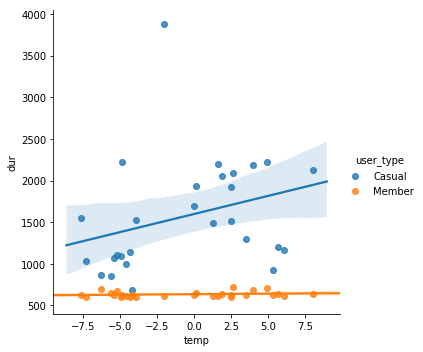

In [29]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(y = 'dur', x = 'temp', hue = 'user_type', data = df)

In [30]:
model = smf.ols("dur ~ temp + C(user_type) + temp:C(user_type)", data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     21.09
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.49e-09
Time:                        20:58:39   Log-Likelihood:                -420.87
No. Observations:                  56   AIC:                             849.7
Df Residuals:                      52   BIC:                             857.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Linear Regression as a Machine Learning Algorithm

0. Select a training and test

1. Fit a linear regression model on the training set.

2. Use the model in 1. to predict the dependent variable in the test set.

3. Calculate a measure of fit on the test and training to evaluate the quality of fit.  For example, the mean squared error is:

$$MSE =\frac{1}{n} \sum_{i=1}^n e_i^2$$





In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# casual is 1 and member is 0

df['user_type_Casual'] = pd.get_dummies(df, columns = ['user_type'])['user_type_Casual']

np.random.seed(24)
df_train = df.sample(frac = 0.75) # 75% data is random sample to train 
df_test = df.drop(index = df_train.index) #25% test
print('Training Data Shape:', df_train.shape, '\nTest Data Shape:', df_test.shape, df.shape) # check df shape

df_train_X = df_train[['precip', 'temp', 'user_type_Casual']] #training features
df_train_Y = df_train[['dur']] #training dependent variable

df_test_X = df_test[['precip', 'temp', 'user_type_Casual']] #test features
df_test_Y = df_test[['dur']] #test dependent variable 

# create linear regression object
regr = linear_model.LinearRegression()

# train the model
regr.fit(df_train_X, df_train_Y)

# predict using test set
df_Y_pred = regr.predict(df_test_X)

# predict using training set
df_Y_pred_train = regr.predict(df_train_X)

print("Test Mean squared error: %.2f" % mean_squared_error(df_test_Y, df_Y_pred))

print("Train Mean squared error: %.2f" % mean_squared_error(df_train_Y, df_Y_pred_train))


Training Data Shape: (42, 9) 
Test Data Shape: (14, 9) (56, 9)
Test Mean squared error: 134022.03
Train Mean squared error: 228741.78
